In [ ]:
# 🪐 Solar system Simulation with NASA SPICE

This project is a 3D visualization of the real orbits of Earth, the Moon, and Jupiter, computed using real telemetry data (kernels) from NASA.

## 🚀 Project Features
- **Calculation:** Uses the `spiceypy` library to process `.bsp` kernels and calculate the exact position of celestial bodies.
- **3D Visualization:** Rendered with `matplotlib` using a dark mode space aesthetic, including a star field background.
- **Real-Time Data:** Connects to the NASA NAIF node to automatically download the most up-to-date orbital data.

## 🛠️ Technologies
- Python
- NASA SPICE Toolkit (SpiceyPy)
- NumPy & Matplotlib



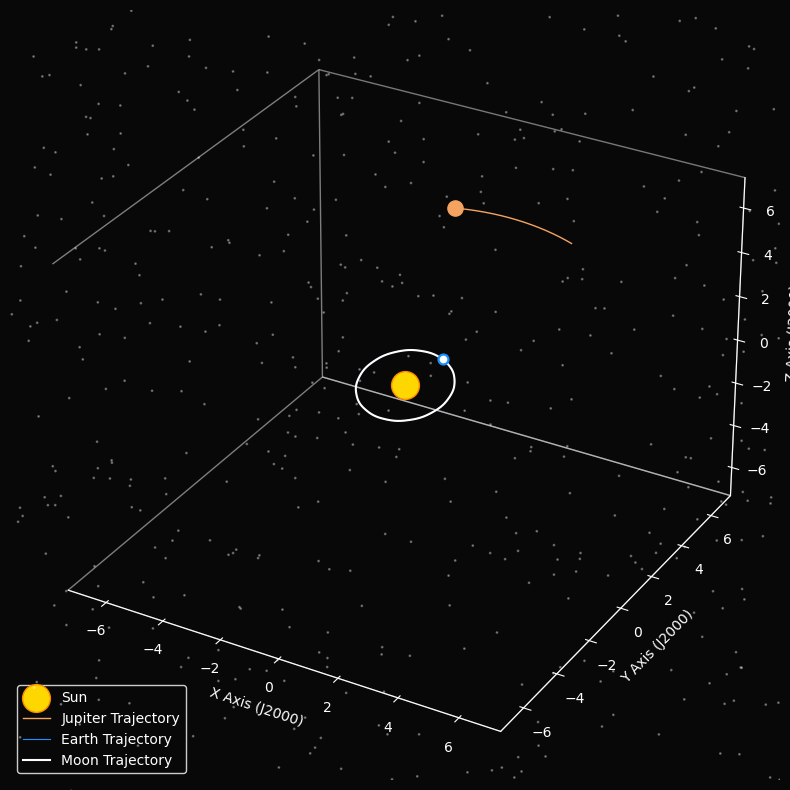

In [5]:
import spiceypy as spice
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import urllib.request
import os



# kernel management:
    
planets_kernel = "planetas_anual.bsp" 
lsk_kernel = "naif0012.tls"
kernel_urls = {
    lsk_kernel: "https://naif.jpl.nasa.gov/pub/naif/generic_kernels/lsk/naif0012.tls", # Leapseconds
    planets_kernel: "https://naif.jpl.nasa.gov/pub/naif/generic_kernels/spk/planets/de432s.bsp" # Ephemerides
}

# Check if files exist. If not, download them
for filename, url in kernel_urls.items():
    if not os.path.exists(filename):
        print(f"Downloading {filename}...")
        try:
            urllib.request.urlretrieve(url, filename)
        except Exception as e:
            print(f"Error downloading {filename}: {e}")

# Furnsh to load files into program memory
spice.furnsh(lsk_kernel)
spice.furnsh(planets_kernel)

today_date = datetime.now()
start_date = today_date - timedelta(days=365) # Look back 1 year

# UTC String -> ET Seconds
et_end = spice.str2et(today_date.strftime('%Y-%m-%d'))
et_start = spice.str2et(start_date.strftime('%Y-%m-%d'))

times = np.linspace(et_start, et_end, 1000)

earth_positions = []
moon_positions = []
jupiter_positions = []

# Trajectory dataset
for t in times:
    
    earth_pos, _ = spice.spkpos('EARTH', t, 'J2000', 'NONE', 'SUN') 
    moon_pos, _ = spice.spkpos('MOON', t, 'J2000', 'NONE', 'SUN')
    jupiter_pos, _ = spice.spkpos('JUPITER BARYCENTER', t, 'J2000', 'NONE', 'SUN')
    
    earth_positions.append(earth_pos)
    moon_positions.append(moon_pos)
    jupiter_positions.append(jupiter_pos)

# Convert lists to numpy arrays for matplotlib 
earth_positions = np.array(earth_positions)
moon_positions = np.array(moon_positions)
jupiter_positions = np.array(jupiter_positions)

# Background stars
system_limit = np.max(np.abs(jupiter_positions))
N_STARS = 2000
dist = system_limit * 4
stars_x = np.random.uniform(-dist, dist, N_STARS)
stars_y = np.random.uniform(-dist, dist, N_STARS)
stars_z = np.random.uniform(-dist, dist, N_STARS)


# ----------------------------------- 3. PLOTTING ----------------------------------------
plt.style.use('dark_background')
BACKGROUND_COLOR = '#080808' 
fig = plt.figure(figsize=(12, 10), facecolor=BACKGROUND_COLOR)
ax = fig.add_subplot(111, projection='3d')
ax.set_facecolor(BACKGROUND_COLOR)

# Axis configuration
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.grid(False)
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.tick_params(axis='z', colors='white')
ax.set_xlabel("X Axis (J2000)", color='white')
ax.set_ylabel("Y Axis (J2000)", color='white')
ax.set_zlabel("Z Axis (J2000)", color='white')

# Stars
ax.scatter(stars_x, stars_y, stars_z, color='white', s=1, alpha=0.3)

# Sun
ax.scatter(0, 0, 0, color='#FFD700', s=400, label='Sun', edgecolors='#FF8C00', zorder=10)

# Jupiter
ax.plot(jupiter_positions[:,0], jupiter_positions[:,1], jupiter_positions[:,2], 
        color='sandybrown', linewidth=1, label='Jupiter Trajectory')
# Earth
ax.plot(earth_positions[:,0], earth_positions[:,1], earth_positions[:,2], 
        color='dodgerblue', linewidth=0.8, label='Earth Trajectory')

# Moon 
ax.plot(moon_positions[:,0], moon_positions[:,1], moon_positions[:,2], 
        color='white', linewidth=1.5, linestyle='-', alpha=1.0, label='Moon Trajectory')

# Current position 
ax.scatter(jupiter_positions[-1,0], jupiter_positions[-1,1], jupiter_positions[-1,2], color='sandybrown', s=120)
ax.scatter(earth_positions[-1,0], earth_positions[-1,1], earth_positions[-1,2], color='dodgerblue', s=60)
ax.scatter(moon_positions[-1,0], moon_positions[-1,1], moon_positions[-1,2], color='white', s=20)

ax.legend(facecolor=BACKGROUND_COLOR, edgecolor='white', labelcolor='white')

# Limits
ax.set_xlim(-system_limit, system_limit)
ax.set_ylim(-system_limit, system_limit)
ax.set_zlim(-system_limit, system_limit)

plt.show()
spice.kclear()